# Chapter 6: Exploratory Data Analysis (EDA)
# By: Parisa Hormozzadeh
EDA helps you understand your dataset through numerical summaries, tables, and visualizations.

---


- Understand data distributions and quality.
- Detect outliers, missing values.
- Discover relationships between variables.
- Inform preprocessing and modeling decisions.

---

## 1. Numerical Summaries
- Mean, median, mode
- Variance, standard deviation
- Quantiles (percentiles)

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Voltage': [220, 230, 210, 225, 240, 215, 235, 205, 200, 250],
    'Current': [10, 15, 9, 12, 14, 11, 13, 8, 7, 16],
    'Power': [2200, 3450, 1890, 2700, 3360, 2365, 3055, 1640, 1400, 4000],
    'Status': ['Normal', 'High', 'Low', 'Normal', 'High', 'Low', 'High', 'Low', 'Low', 'High']
}
df = pd.DataFrame(data)
df

,Voltage,Current,Power,Status
0,220,10,2200,Normal
1,230,15,3450,High
2,210,9,1890,Low
3,225,12,2700,Normal
4,240,14,3360,High
5,215,11,2365,Low
6,235,13,3055,High
7,205,8,1640,Low
8,200,7,1400,Low
9,250,16,4000,High


### 1.1. Mean, Median, Mode


In [3]:
print("Mean Voltage:", df['Voltage'].mean())
print("Median Voltage:", df['Voltage'].median())
print("Mode Voltage:", df['Voltage'].mode().values)

Mean Voltage: 223.0
Median Voltage: 222.5
Mode Voltage: [200 205 210 215 220 225 230 235 240 250]


### 1.2. Variance and Standard Deviation


In [4]:
print("Variance of Current:", df['Current'].var())
print("Standard Deviation of Current:", df['Current'].std())

Variance of Current: 9.166666666666666
Standard Deviation of Current: 3.0276503540974917


### 1.3. Quantiles


In [5]:
print("25th percentile of Power:", df['Power'].quantile(0.25))
print("75th percentile of Power:", df['Power'].quantile(0.75))

25th percentile of Power: 1967.5
75th percentile of Power: 3283.75


## 2. Tabular Summaries
### 2.1. Frequency Counts


In [8]:
df['Status'].value_counts()

High      4
Low       4
Normal    2
Name: Status, dtype: int64

<AxesSubplot:>

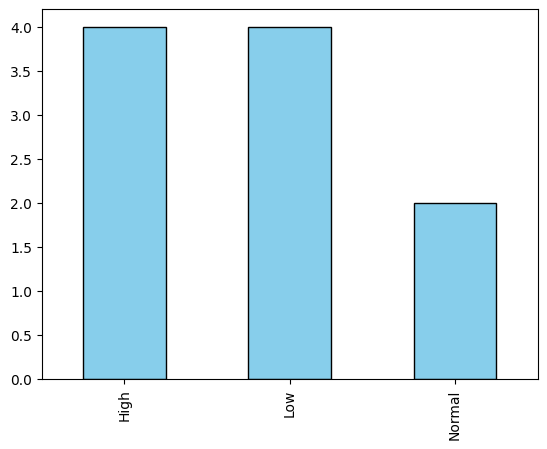

In [11]:
counts = df['Status'].value_counts()
counts.plot(kind='bar')

📊 Common Plot Types in Pandas
'line': Line plot (default)

'bar': Vertical bar plot

'barh': Horizontal bar plot

'hist': Histogram

'box': Box plot

'kde' or 'density': Kernel Density Estimation plot

'area': Area plot

'pie': Pie chart

'scatter': Scatter plot (for DataFrames)

'hexbin': Hexagonal bin plot (for DataFrames)

<BarContainer object of 3 artists>

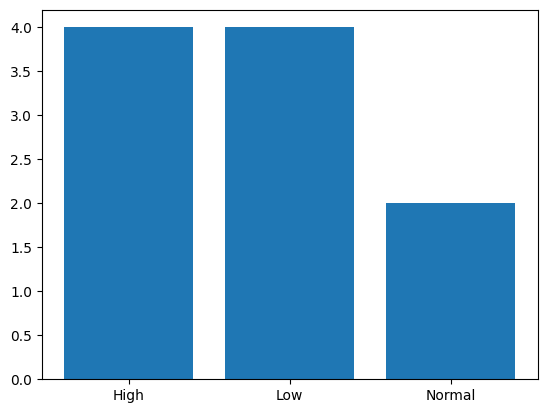

In [14]:
categories = counts.index
values = counts.values

plt.bar(categories, values)

<AxesSubplot:xlabel='Status', ylabel='count'>

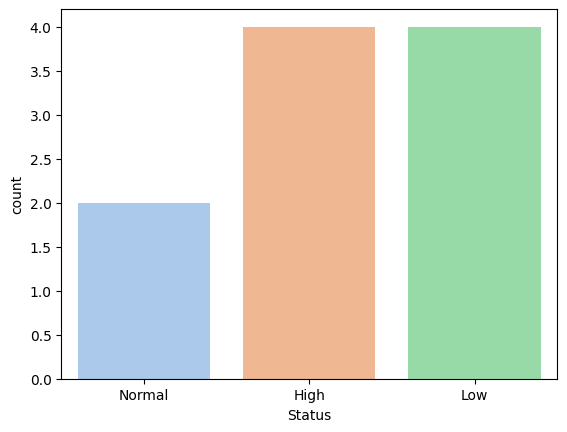

In [13]:
sns.countplot(x='Status', data=df, palette='pastel')

## 3. Graphical Methods
- Visualize data to better understand distributions and relationships.
- Use matplotlib and seaborn libraries.

---

### 3.1. Histogram
Shows distribution of a numerical variable.


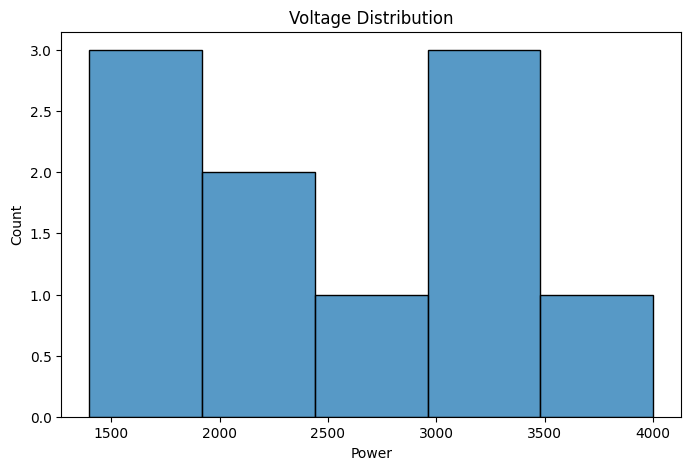

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Power'], bins=5)
plt.title('Voltage Distribution')
plt.show()

### 3.2. Box Plot
Visualizes distribution and outliers.


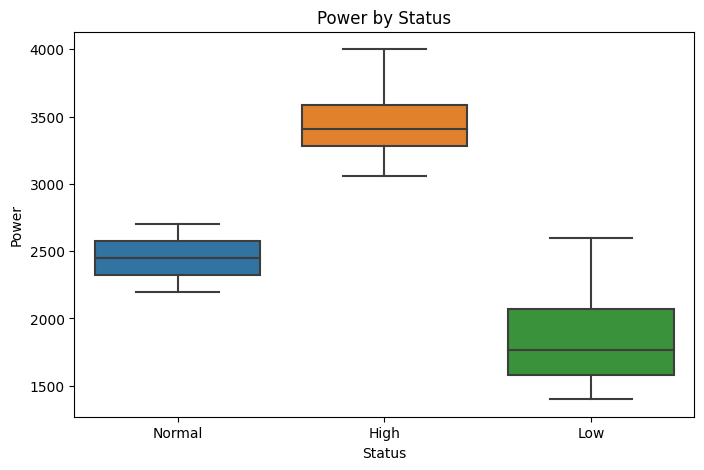

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Status', y='Power', data=df)
plt.title('Power by Status')
plt.show()

## 🔍 How to Identify Outliers in a Boxplot
Each boxplot (for Normal, High, Low) shows:

Middle line → median (Q2)

Box edges → Q1 (25th percentile) and Q3 (75th percentile)

Whiskers → extend to values within 1.5 × IQR (interquartile range)

Dots or points outside the whiskers → outliers

In [38]:
# Calculate Q1, Q3, IQR and outlier bounds for the 'Power' column
Q1_power = df['Power'].quantile(0.25)
Q3_power = df['Power'].quantile(0.75)
IQR_power = Q3_power - Q1_power

lower_bound_power = Q1_power - 1.5 * IQR_power
upper_bound_power = Q3_power + 1.5 * IQR_power

lower_bound_power , upper_bound_power

(-6.875, 5258.125)

In [40]:
outliers = []
for value in df['Power']:
    if (value < lower_bound_power) or (value > upper_bound_power):
        outliers.append(value)

print("Outliers:", outliers)

Outliers: []


### 3.3. Scatter Plot
Shows relationship between two numerical variables.


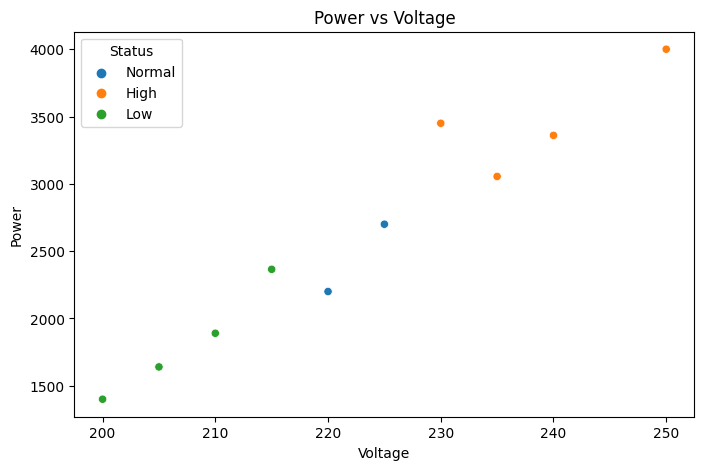

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Voltage', y='Power', hue='Status', data=df)
plt.title('Power vs Voltage')
plt.show()

### 3.4. Correlation Heatmap
Shows correlations between numerical variables.


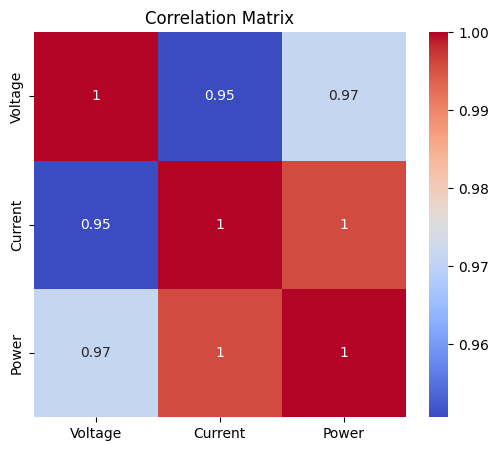

In [42]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Summary
- EDA is crucial to understanding your data.
- Numerical, tabular, and graphical methods complement each other.
- Visualization often reveals patterns not obvious in tables.

Next steps: Use EDA results to guide feature engineering and modeling.